In [ ]:
pip install pyod

In [ ]:

from __future__ import division
from __future__ import print_function

import os
import sys
import csv
import glob
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import IsolationForest
from sklearn import metrics 
from sklearn.ensemble import IsolationForest



from pyod.models.iforest import IForest
from pyod.utils.data import generate_data

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


if __name__ == "__main__":
  
    #csv file path
    path='/content/drive/My Drive/Colab Notebooks/security/data'
    fullpath=os.path.join(path, 'AnomalyDetect_train.csv')

    dataset = pd.read_csv(fullpath)
    #dataset= dataset.dropna(axis=0)
    dataset = dataset.replace([np.inf, -np.inf],1)
    dataset = dataset.replace([np.nan],0)
    x_data=dataset.iloc[:,:-1]
    y_data=dataset.iloc[:,[-1]]
    del x_data['Dst Port']
    del x_data['Timestamp']


    # Generate sample data
    # 8:2=train:test
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

    print(x_data.head())
    print(X_test.head())

    # 0.04%의 outlier 색출.
    clf=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.004),max_features=1.0)
    clf.fit(X_train)
    pred = clf.predict(X_test)
    X_test['anomaly']=pred
    print(X_test)
    outliers=X_test.loc[X_test['anomaly']==-1]
    outlier_index=list(outliers.index)
   
    #Find the number of anomalies and normal points here points classified -1 are anomalous
    print(X_test['anomaly'].value_counts())


   Protocol  Flow Duration  Tot Fwd Pkts  ...  Idle Std  Idle Max  Idle Min
0         6         141385             9  ...       0.0         0         0
1         6            281             2  ...       0.0         0         0
2         6         279824            11  ...       0.0         0         0
3         6            132             2  ...       0.0         0         0
4         6         274016             9  ...       0.0         0         0

[5 rows x 77 columns]
       Protocol  Flow Duration  Tot Fwd Pkts  ...  Idle Std  Idle Max  Idle Min
36356         6        1671632             8  ...       0.0         0         0
32892        17         111308             2  ...       0.0         0         0
42039         6         791613             5  ...       0.0         0         0
38383         6         299209             3  ...       0.0         0         0
38032         6         206382             3  ...       0.0         0         0

[5 rows x 77 columns]
       Protocol  F

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


정확도 : 0.992931103146157


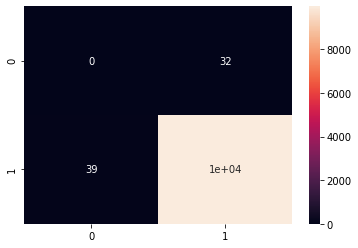

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
  
answer=[]
for a in y_test['Label']:
  if a == "Benign":
    answer.append(1)
  else:
    answer.append(-1)
 
# check accuracy
print('정확도 :', metrics.accuracy_score(answer, X_test['anomaly']))


confusion_mat=confusion_matrix(answer, X_test['anomaly'])
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(answer, X_test['anomaly'])
print(p)
r = recall_score(answer, X_test['anomaly'])
print(r)
f1 = f1_score(answer, X_test['anomaly'])
print(f1)

0.9968015992003998
0.9961046743907311
0.9964530149373033
